<b> Bag of words: Exercises </b>

In this Exercise, you are going to classify whether a given movie review is positive or negative.

you are going to use Bag of words for pre-processing the text and apply different classification algorithms.

Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [92]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

About Data: IMDB Dataset
Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

This data consists of two columns. - review - sentiment
Reviews are the statements given by users after watching the movie.
sentiment feature tells whether the given review is positive or negative.

In [93]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable

df = pd.read_csv('movies_sentiment_data.csv')


#2. print the shape of the data
df.shape


(19000, 2)

In [94]:
#3. print top 5 datapoints
df.head()

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [95]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative

df['Category'] = df['sentiment'].apply(lambda x : 1 if x == "positive" else 0)

In [96]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.

df['Category'].value_counts()

Category
1    9500
0    9500
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

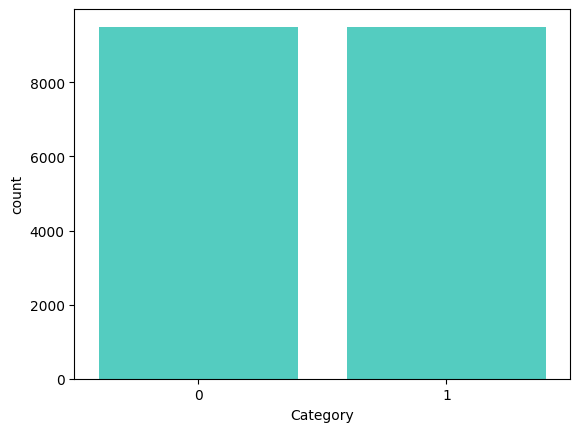

In [97]:
import seaborn as sns

sns.countplot(data = df, x = 'Category', color = '#40E0D0')

In [98]:
df.head()

,review,sentiment,Category
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive,1
1,I enjoyed the movie and the story immensely! I...,positive,1
2,I had a hard time sitting through this. Every ...,negative,0
3,It's hard to imagine that anyone could find th...,negative,0
4,This is one military drama I like a lot! Tom B...,positive,1


In [99]:
#Do the 'train-test' splitting with test size of 20%

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['Category'], test_size = 0.2, random_state = 20)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15200,)
(3800,)
(15200,)
(3800,)


In [101]:
type(X_train)

pandas.core.series.Series

In [102]:
X_train[:4]

18593    'A comedy of biblical proportions!' Those mast...
7393     This movie is one of the masterpieces from Mr....
11881    There were a lot of dumb teenage getting sex m...
7697     The effect achieved in this story about a psyc...
Name: review, dtype: object

<b>Exercise-1</b>

using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.
Note:

use CountVectorizer for pre-processing the text.

use Random Forest as the classifier with estimators as 50 and criterion as entropy.

print the classification report.

References:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html



In [103]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                    #initializing the vectorizer
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))      #using the RandomForest classifier
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1924
           1       0.83      0.82      0.83      1876

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



Exercise-2

using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..
Note:

use CountVectorizer for pre-processing the text.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean'.
print the classification report.
References:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [105]:

#1. create a pipeline object
clf = Pipeline([
      ('vectorizer', CountVectorizer()),   
      ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))   #using the KNN classifier with 10 neighbors 
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1924
           1       0.64      0.64      0.64      1876

    accuracy                           0.64      3800
   macro avg       0.64      0.64      0.64      3800
weighted avg       0.64      0.64      0.64      3800




<b>Exercise-3</b>

using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..
Note:

use CountVectorizer for pre-processing the text.
use Multinomial Naive Bayes as the classifier.
print the classification report.
References:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [106]:
#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('Naive Bayes', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_prediction = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1924
           1       0.88      0.82      0.85      1876

    accuracy                           0.85      3800
   macro avg       0.86      0.85      0.85      3800
weighted avg       0.86      0.85      0.85      3800



Can you write some observations of why model like KNN fails to produce good results unlike RandomForest and MultinomialNB?

1) As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.

2) In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words.

3) Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.

4) The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.

5) As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.

6) Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.

Refer these resources to get good idea:

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
https://analyticsindiamag.com/naive-bayes-why-is-it-favoured-for-text-related-tasks/